In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [160]:
data = pd.read_csv("district wise rainfall normal.csv")
data.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [188]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
STATE_UT_NAME    641 non-null object
DISTRICT         641 non-null object
JAN              641 non-null float64
FEB              641 non-null float64
MAR              641 non-null float64
APR              641 non-null float64
MAY              641 non-null float64
JUN              641 non-null float64
JUL              641 non-null float64
AUG              641 non-null float64
SEP              641 non-null float64
OCT              641 non-null float64
NOV              641 non-null float64
DEC              641 non-null float64
ANNUAL           641 non-null float64
Jan-Feb          641 non-null float64
Mar-May          641 non-null float64
Jun-Sep          641 non-null float64
Oct-Dec          641 non-null float64
dtypes: float64(17), object(2)
memory usage: 95.2+ KB


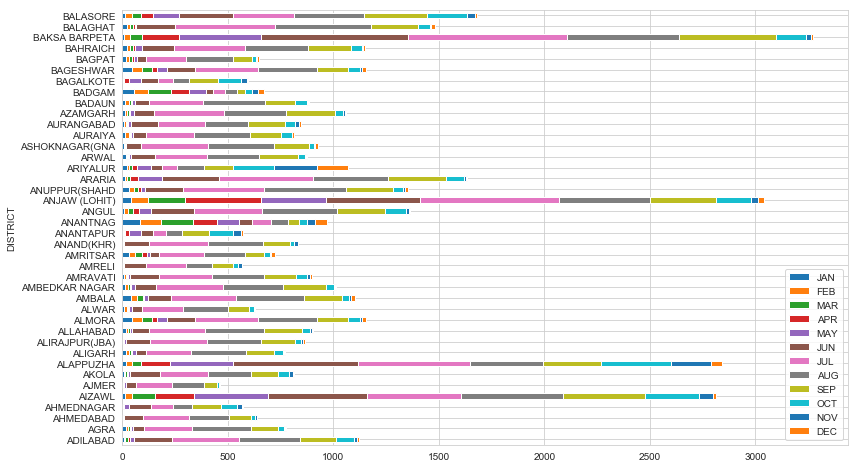

In [162]:
data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(13,8));

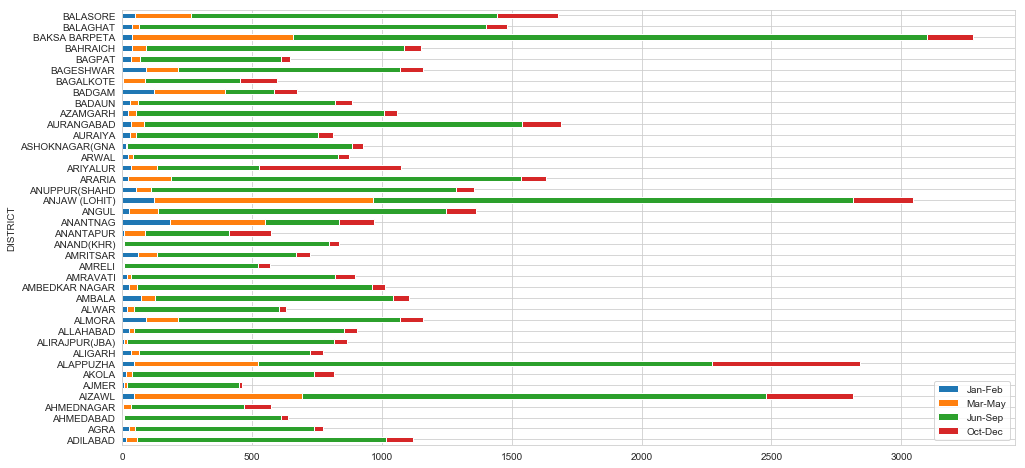

In [163]:
data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

In [164]:
tn_data = data[data['STATE_UT_NAME'] == 'TAMIL NADU']

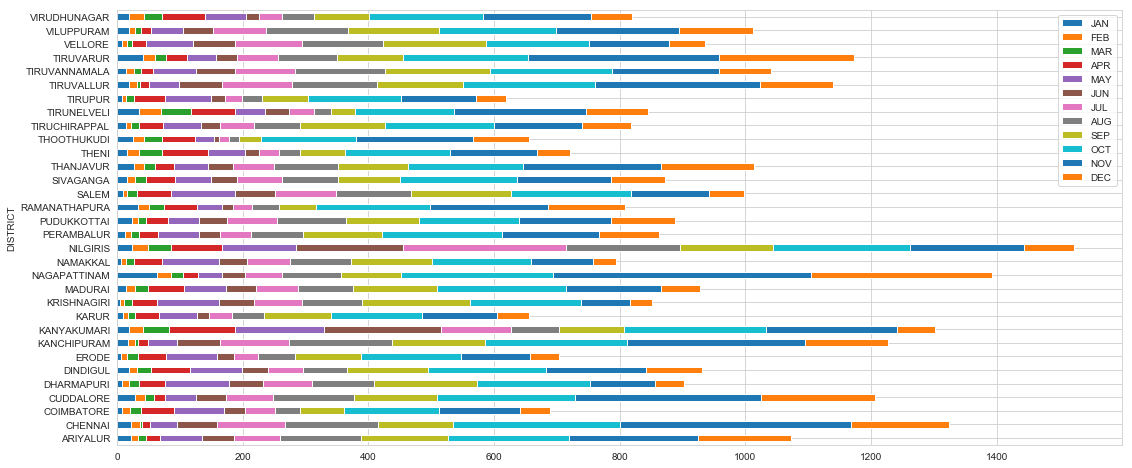

In [165]:
tn_data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(18,8));

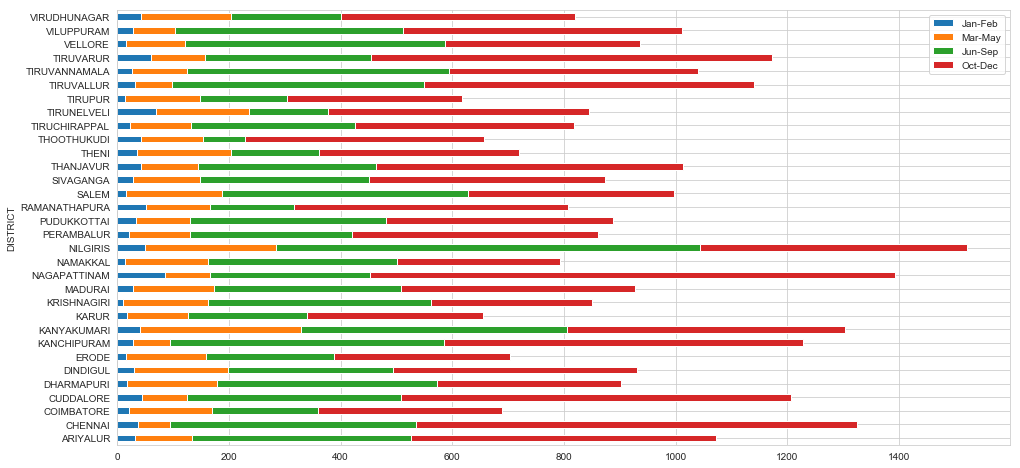

In [166]:
tn_data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

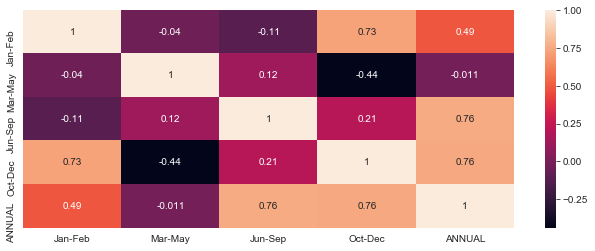

In [167]:
plt.figure(figsize=(11,4))
sns.heatmap(tn_data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

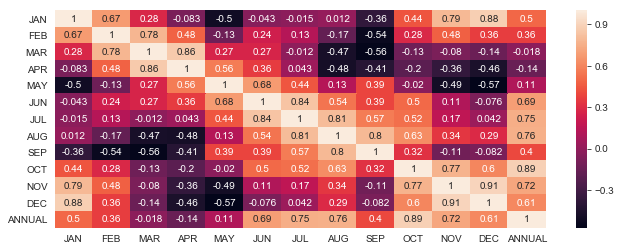

In [168]:
plt.figure(figsize=(11,4))
sns.heatmap(tn_data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [172]:
Acclist = []
division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

x = None; y = None
for i in range(division_data.shape[1]-3):
    if x is None:
        x = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        x = np.concatenate((x, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [174]:
temp = data[['DISTRICT','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['STATE_UT_NAME'] == 'TAMIL NADU']
maa = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['DISTRICT'] == 'CHENNAI'])
# print temp
x_year = None; y_year = None
for i in range(maa.shape[1]-3):
    if x_year is None:
        x_year = maa[:, i:i+3]
        y_year = maa[:, i+3]
    else:
        x_year = np.concatenate((x_year, maa[:, i:i+3]), axis=0)
        y_year = np.concatenate((y_year, maa[:, i+3]), axis=0)

Training accuracy: 74.560
Test accuracy: 73.415


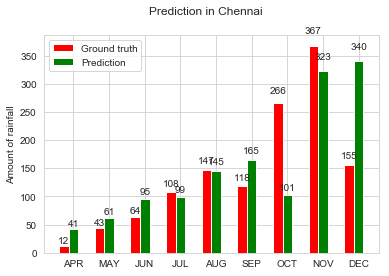

In [193]:
# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(x_train, y_train)
print('Training accuracy: {:.3f}'.format(reg.score(x_train, y_train)*100))
print('Test accuracy: {:.3f}'.format(reg.score(x_test, y_test)*100))
p = reg.score(x_test, y_test)*100
p1 = round(p, 2)
Acclist.append(p1)
y_pred = reg.predict(x_test)
y_year_pred = reg.predict(x_year)

plot_graphs(y_year,y_year_pred,"Prediction in Chennai")

Training accuracy: 92.534
Test accuracy: 56.653


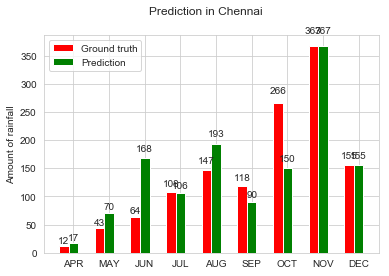

In [194]:
#SVM
svm = SVR(gamma = 'scale', C = 1000, epsilon = 0.2)
svm.fit(x_train, y_train)
print('Training accuracy: {:.3f}'.format(svm.score(x_train, y_train)*100))
print('Test accuracy: {:.3f}'.format(svm.score(x_test, y_test)*100))
y_pred = svm.predict(x_test)
y_year_pred = svm.predict(X_year)

plot_graphs(y_year,y_year_pred,"Prediction in Chennai")

Accuracy on training set: 74.191
Accuracy on test set: 69.801


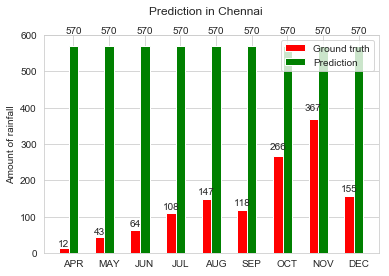

In [195]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

svs = SVR(gamma = 'auto', C = 1000, epsilon = 0.5)
svs.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svs.score(x_train_scaled, y_train)*100))
print("Accuracy on test set: {:.3f}".format(svs.score(x_test_scaled, y_test)*100))
p = svs.score(x_test_scaled, y_test)*100
p1 = round(p, 2)
Acclist.append(p1)

y_pred = svs.predict(x_test)
y_year_pred = svs.predict(x_year)

plot_graphs(y_year,y_year_pred,"Prediction in Chennai")

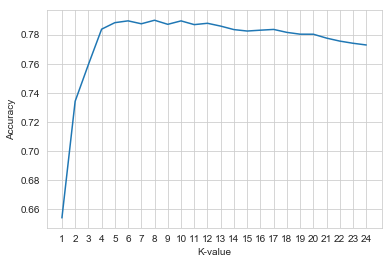

Maximum KNN Accuracy is: 78.99%


In [178]:
#KNN
scoretest=[]
for i in range(1,25):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train, y_train)
    scoretest.append(knn.score(x_test, y_test))

plt.plot(range(1, 25), scoretest)
plt.xticks(np.arange(1, 25, 1))
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.show()

print('Maximum KNN Accuracy is: {:.2f}%'.format((max(scoretest))*100))
p = max(scoretest)*100
p1 = round(p,2)
Acclist.append(p1)

Training accuracy: 96.979
Test accuracy: 78.661


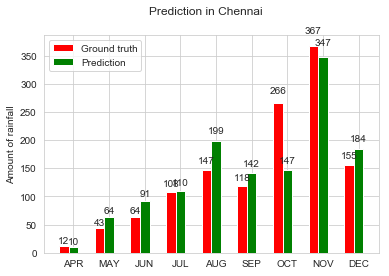

In [196]:
#Random Forest
rf = RandomForestRegressor(n_estimators = 20, random_state = 2)
rf.fit(x_train, y_train)
print('Training accuracy: {:.3f}'.format(rf.score(x_train, y_train)*100))
print('Test accuracy: {:.3f}'.format(rf.score(x_test, y_test)*100))
p = max(scoretest)*100
p1 = round(p,2)
Acclist.append(p1)
y_pred = rf.predict(x_test)
y_year_pred = rf.predict(x_year)

plot_graphs(y_year,y_year_pred,"Prediction in Chennai")

Training accuracy: 86.859
Test accuracy: 76.274


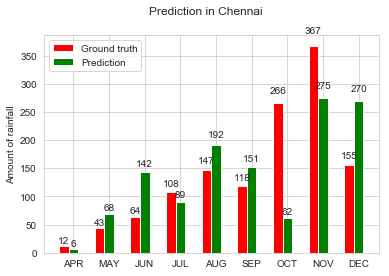

In [197]:
#Decision Tree
dt = DecisionTreeRegressor(random_state = 10, max_depth = 7) 
dt.fit(x_train, y_train)
print('Training accuracy: {:.3f}'.format(dt.score(x_train, y_train)*100))
print('Test accuracy: {:.3f}'.format(dt.score(x_test, y_test)*100))
p = max(scoretest)*100
p1 = round(p,2)
Acclist.append(p1)
y_pred = dt.predict(x_test)
y_year_pred = dt.predict(x_year)

plot_graphs(y_year,y_year_pred,"Prediction in Chennai")

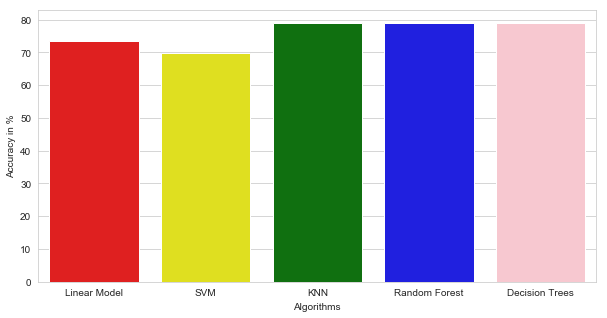

In [181]:
Algos = ['Linear Model', 'SVM', 'KNN', 'Random Forest', 'Decision Trees']
colors = ['red', 'yellow', 'green', 'blue',  'pink']

sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel('Accuracy in %')
plt.xlabel('Algorithms')
sns.barplot(x = Algos, y = Acclist, palette = colors)
plt.show()

In [205]:
rf.predict([[27.2,31,68.065]])

array([145.275])